In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import os

load data

In [2]:
workdir = os.getcwd()
monthly_filename = 'fluxes_monthly4.1978-01.nc'
daily_filename = 'fluxes_daily4.1978-01-01.nc'
domain_file = 'calm_domain_file_adj_11282016.nc'
params_ncfile = 'params_calm_sites_11282016.nc'
mo_fluxes = xr.open_dataset(os.path.join(workdir, monthly_filename))
day_fluxes = xr.open_dataset(os.path.join(workdir, daily_filename))
domain = xr.open_dataset(os.path.join(workdir, domain_file))
params = xr.open_dataset(os.path.join(workdir, params_ncfile))

set up data for Barrow CALM site (71.316667, 203.400000)

In [3]:
barrow_lat = 71.316667
barrow_lng = 203.400000

min_arg = (((domain.xc - barrow_lng)**2) + ((domain.yc - barrow_lat)**2)).argmin()
nj_ind, ni_ind = np.unravel_index(min_arg, domain.xc.shape)
print(nj_ind)
print(ni_ind)
soil_depths = params.depth[:, nj_ind, ni_ind]
soil_temps = mo_fluxes.OUT_SOIL_TEMP[0, :, nj_ind, ni_ind]

73
130


full time series of soil temps for the 3 layers

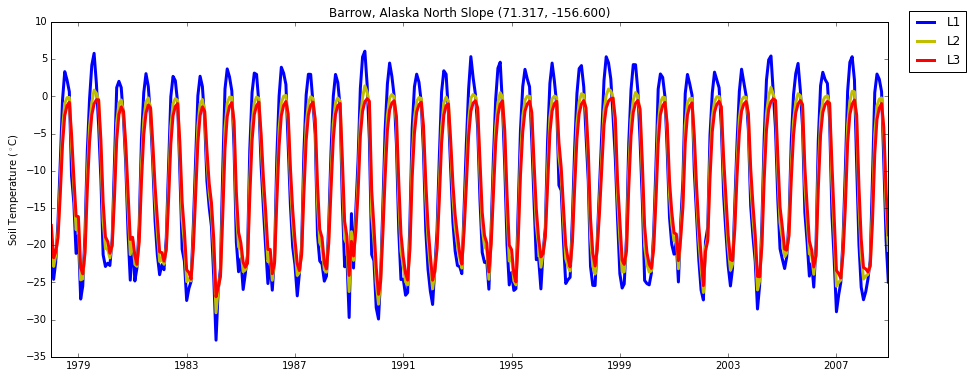

In [9]:
plt.figure(figsize=(15, 6))
dpi = 200
lw = 3.0
plt.plot(mo_fluxes.time, mo_fluxes.OUT_SOIL_TEMP[:, 0, nj_ind, ni_ind], linewidth=lw, label='L1', color='b')
plt.plot(mo_fluxes.time, mo_fluxes.OUT_SOIL_TEMP[:, 1, nj_ind, ni_ind], linewidth=lw, label='L2', color='y')
plt.plot(mo_fluxes.time, mo_fluxes.OUT_SOIL_TEMP[:, 2, nj_ind, ni_ind], linewidth=lw, label='L3', color='r')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Barrow, Alaska North Slope (71.317, -156.600)')
plt.ylabel('Soil Temperature ($^\circ$C)')

plotname = 'barrow_soiltemps_full_ts.png'
savepath = os.path.join(workdir, 'plots')
if not os.path.exists(savepath):
    os.makedirs(savepath)
plt.savefig(os.path.join(savepath, plotname), format='png', dpi=dpi, bbox_inches='tight')

soil temps for the 3 layers for one year

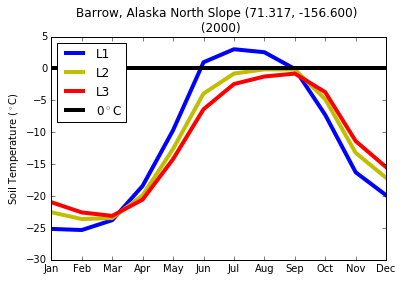

In [11]:
lw = 4.0
plt.plot(mo_fluxes.OUT_SOIL_TEMP[:, 0, nj_ind, ni_ind].sel(time=slice('2000-01-01', '2000-12-31')), color='b', 
         label='L1', linewidth=lw)
plt.plot(mo_fluxes.OUT_SOIL_TEMP[:, 1, nj_ind, ni_ind].sel(time=slice('2000-01-01', '2000-12-31')), color='y', 
         label='L2', linewidth=lw)
plt.plot(mo_fluxes.OUT_SOIL_TEMP[:, 2, nj_ind, ni_ind].sel(time=slice('2000-01-01', '2000-12-31')), color='r', 
         label='L3', linewidth=lw)
plt.plot(np.arange(0, 12), np.zeros(12), color='k', label='0$^\circ$C', linewidth=lw)
plt.legend(loc='upper left')
# plt.title('Soil Temps 1978-1979 (1978-2008 run monthly output)')
plt.title('Barrow, Alaska North Slope (71.317, -156.600) \n (2000)')
plt.ylabel('Soil Temperature ($^\circ$C)')
plt.xlim([0,11])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(0, 12), months)

plotname = 'barrow_soiltemps_one_year.png'
savepath = os.path.join(workdir, 'plots')
if not os.path.exists(savepath):
    os.makedirs(savepath)
plt.savefig(os.path.join(savepath, plotname), format='png', dpi=dpi, bbox_inches='tight')

and for two years to see when the 1st layer and 3rd layer cross again (they don't cross back in the 1-yr simulations, and it seems like it occurs around Feb-March, that's reasonable) 

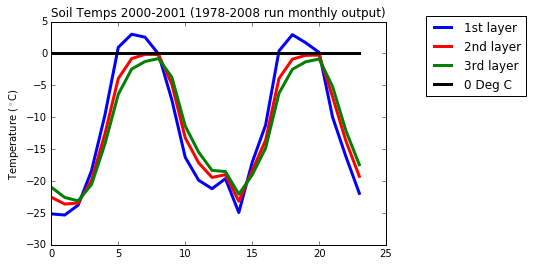

In [14]:
lw = 3.0
plt.plot(mo_fluxes.OUT_SOIL_TEMP[:, 0, nj_ind, ni_ind].sel(time=slice('2000-01-01', '2001-12-31')), color='b', 
         label='1st layer', linewidth=lw)
plt.plot(mo_fluxes.OUT_SOIL_TEMP[:, 1, nj_ind, ni_ind].sel(time=slice('2000-01-01', '2001-12-31')), color='r', 
         label='2nd layer', linewidth=lw)
plt.plot(mo_fluxes.OUT_SOIL_TEMP[:, 2, nj_ind, ni_ind].sel(time=slice('2000-01-01', '2001-12-31')), color='g', 
         label='3rd layer', linewidth=lw)
plt.plot(np.arange(0, 24), np.zeros(24), color='k', label='0 Deg C', linewidth=lw)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1.05))
plt.title('Soil Temps 2000-2001 (1978-2008 run monthly output)')
plt.ylabel('Temperature ($^\circ$C)')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 
          'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# plt.xticks(np.arange(0, 24), months)

full time series again, for good measure 

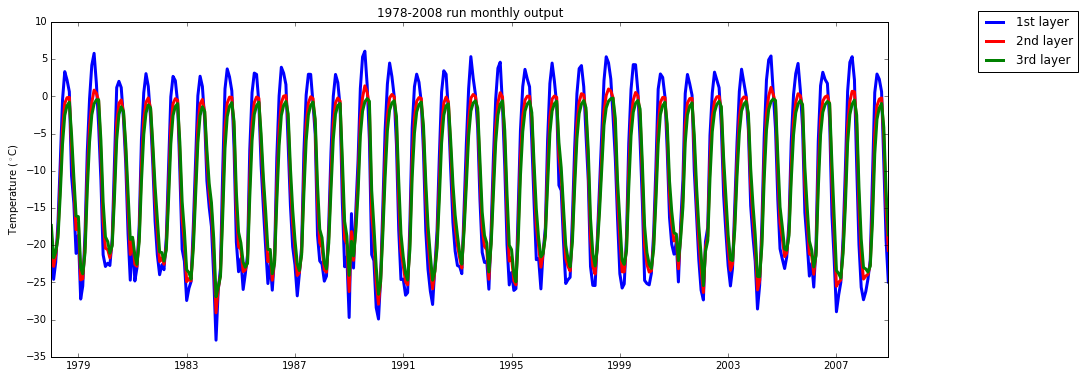

In [7]:
plt.figure(figsize=(15, 6))
lw = 3.0
plt.plot(mo_fluxes.time, mo_fluxes.OUT_SOIL_TEMP[:, 0, nj_ind, ni_ind], color='b', 
         label='1st layer', linewidth=lw)
plt.plot(mo_fluxes.time, mo_fluxes.OUT_SOIL_TEMP[:, 1, nj_ind, ni_ind], color='r', 
         label='2nd layer', linewidth=lw)
plt.plot(mo_fluxes.time, mo_fluxes.OUT_SOIL_TEMP[:, 2, nj_ind, ni_ind], color='g', 
         label='3rd layer', linewidth=lw)
# plt.plot(np.arange(0, 24), np.zeros(24), color='k', label='0 Deg C', linewidth=lw)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1.05))
plt.title('1978-2008 run monthly output')
plt.ylabel('Temperature ($^\circ$C)')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 
          'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# plt.xticks(np.arange(0, 24), months)

plot all of the profiles to understand why some values are negative (basically whenever the soil is warming up, but it's still really cold, the zero depths can be negative with this method because the only way the thermal profile could cross the x axis is if it occurred above the ground) 

[  4.87415753   6.57757306  12.38593857  -6.00883353  -1.49473588
   0.05822993   0.53044017   0.59540252   0.48341569   1.56813548
   3.29447776   3.31163297]


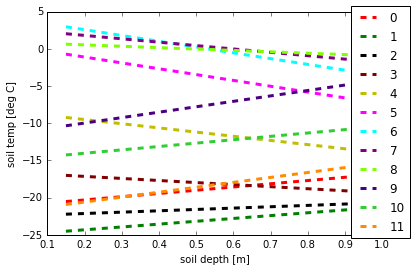

In [8]:
u = np.diff(np.insert(np.cumsum(soil_depths.values), 0, 0., axis=0)) / 2.0
v = np.cumsum(np.insert(soil_depths.values, 0, 0., axis=0))[:-1]
mid_soil_depths = u + v
zero_depths = []
colors = ['r', 'g', 'k', 'maroon', 'y', 'magenta', 'cyan', 'purple', 'chartreuse', 'indigo', 
          'limegreen', 'darkorange']

for mo_num in range(0, 12):
    ts_soiltemps = mo_fluxes.OUT_SOIL_TEMP[:, :, nj_ind, ni_ind].sel(time=slice('1978-01-01', '1978-12-31'))[mo_num]
    m, b = np.polyfit(mid_soil_depths, ts_soiltemps, 1)
    zero_depth = (0 - b) / m
    zero_depths = np.append(zero_depths, zero_depth)
    plt.plot(mid_soil_depths, mid_soil_depths*m + b, color=colors[mo_num], linewidth = lw, 
             linestyle='--', label=mo_num)
    plt.xlabel('soil depth [m]')
    plt.ylabel('soil temp [deg C]')
plt.legend(bbox_to_anchor=(1.1, 1.05))
print(zero_depths)

<xarray.DataArray 'depth' ()>
array(1.0247190000000002)
Coordinates:
    yc       float64 71.43
    xc       float64 -156.6
    ni       int64 130
    nj       int64 73
0.595402517137
[  4.87415753   6.57757306  12.38593857  -6.00883353  -1.49473588
   0.05822993   0.53044017   0.59540252   0.48341569   1.56813548
   3.29447776   3.31163297]


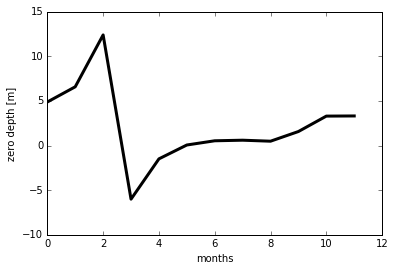

In [9]:
plt.plot(np.arange(0, 12), zero_depths, color='k', linewidth=lw)
plt.xlabel('months')
plt.ylabel('zero depth [m]')
print(soil_depths.sum())
print(zero_depths[(zero_depths > 0) & (zero_depths < np.sum(soil_depths.values))].max())
print(zero_depths)

find the max zero depths (e.g. annual maximum thaw depth) for the full time series, and this should occur between June - September, so if it's not, this method raises an error  

In [10]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# calculate the midpoints of the soil layers to calculate the thermal profile of the soil layers
u = np.diff(np.insert(np.cumsum(soil_depths.values), 0, 0., axis=0)) / 2.0
v = np.cumsum(np.insert(soil_depths.values, 0, 0., axis=0))[:-1]
mid_soil_depths = u + v
colors = ['r', 'g', 'k', 'maroon', 'y', 'magenta', 'cyan', 'purple', 'chartreuse', 'indigo', 
          'limegreen', 'darkorange']

# initialize array of annual maximum thaw depths 
annual_max_thaw_depths = []

# loop over years and calculate annual maximum thaw depths 
for year in range(1978, 2009):
    year_start = '%s-01-01' % year
    year_end = '%s-12-31' %year
    # initialize array of zero depths for the year (so that we can then find the max)
    zero_depths = []

    # loop over each month and calculate the thermal profile (soil temp / depth linear regression)
    for mo_num in range(0, 12):
        ts_soiltemps = mo_fluxes.OUT_SOIL_TEMP[:, :, nj_ind, ni_ind].sel(time=slice(year_start, year_end))[mo_num]
        m, b = np.polyfit(mid_soil_depths, ts_soiltemps, 1)
        
        # solve linear equation for where soil temp = 0 deg C
        zero_depth = (0 - b) / m
        zero_depths = np.append(zero_depths, zero_depth)
    
    # process zero depths for the whole year (remove negative ones and ones that are below the soil layers 
    # because we don't care about those - those values aren't physically based). Note that negative values 
    # indicate that the thermal profile is only greater than 0 above ground, which should be discarded 
    # (this can occur when the soil is warming but the temps are still very cold, e.g. < -15 deg C)
    annual_max_thaw_depth = zero_depths[(zero_depths > 0) & 
                                                   (zero_depths < np.sum(soil_depths.values))].max()
    annual_max_thaw_depths = np.append(annual_max_thaw_depths, annual_max_thaw_depth)
                                       
    # check to ensure that the annual maximum thaw depth is occurring in the summer months (May - Sept)
    ind_month = np.where(zero_depths == annual_max_thaw_depth)[0]
    if (ind_month < 5) or (ind_month > 9):
        raise ValueError('this annual maximum thaw depth should be occurring in the summer' \
                         'rather than in %s' %months[ind_month])
                                       

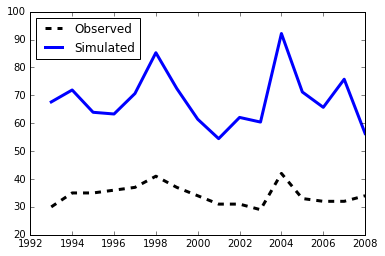

In [11]:
barrow_thaw_depths = [30, 35, 35, 36, 37, 41, 37, 34, 31, 31, 29, 42, 33, 32, 32, 34]
barrow_years = np.arange(1993, 2009)
plt.plot(barrow_years, barrow_thaw_depths, linewidth=lw, color='k', linestyle='--', label='Observed')
vic_years = np.arange(1978, 2009)
plt.plot(vic_years[vic_years > 1992], (annual_max_thaw_depths[vic_years > 1992] * 100.0), linewidth=lw, linestyle='-',
         label='Simulated')
plt.legend(loc='upper left')

fit line to temperature/depth for one day

1.56813548154


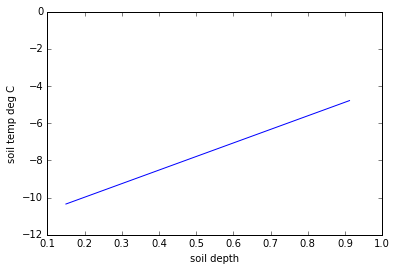

In [12]:
# fit line with x = soil depth, y = soil temperature 
soil_temps = mo_fluxes.OUT_SOIL_TEMP[9, :, nj_ind, ni_ind]
m, b = np.polyfit(mid_soil_depths, soil_temps, 1)
plt.plot(mid_soil_depths, mid_soil_depths*m + b)
plt.plot(mid_soil_depths, [0, 0, 0], 'k--')
plt.xlabel('soil depth')
plt.ylabel('soil temp deg C')

# depth at which thaw depth occurs is where y (soil temp) = 0
# y = mx + b, x = (y - b) / m
zero_depth = (0 - b) / m
print(zero_depth)


In [13]:
np.sum(soil_depths)

<xarray.DataArray 'depth' ()>
array(1.0247190000000002)
Coordinates:
    yc       float64 71.43
    xc       float64 -156.6
    ni       int64 130
    nj       int64 73